In [227]:
import pandas as pd

In [228]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lowa02\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [229]:
sid = SentimentIntensityAnalyzer()

In [230]:
from datetime import datetime

In [231]:
from dateutil.parser import parse

In [232]:
wc_df = pd.read_csv("https://raw.githubusercontent.com/solaojp/DATA-620/master/Fifa.csv", header=None, encoding='utf-8')

In [233]:
wc_df.head()

,0,1
0,7/11/18 15:27,"b""@Hartwell_co_uk They're goddamn right it is!..."
1,7/11/18 15:27,"b""@Hartwell_co_uk They're goddamn right it is!..."
2,7/13/18 15:33,b'Here @sandwellroads we\xe2\x80\x99ll be chee...
3,7/13/18 15:33,b'RT @CoveBilly: This was the nuts!! \xf0\x9f\...
4,7/13/18 15:33,b'RT @16AirAssltBde: #ItsComingHome \nStill to...


In [234]:
wc_df.columns = ['datetime','tweet']

In [235]:
wc_df['sentiment'] = [sid.polarity_scores(tweet)["compound"] for tweet in wc_df['tweet']]

In [236]:
wc_df.head()

,datetime,tweet,sentiment
0,7/11/18 15:27,"b""@Hartwell_co_uk They're goddamn right it is!...",-0.5255
1,7/11/18 15:27,"b""@Hartwell_co_uk They're goddamn right it is!...",-0.5255
2,7/13/18 15:33,b'Here @sandwellroads we\xe2\x80\x99ll be chee...,0.5106
3,7/13/18 15:33,b'RT @CoveBilly: This was the nuts!! \xf0\x9f\...,-0.4374
4,7/13/18 15:33,b'RT @16AirAssltBde: #ItsComingHome \nStill to...,0.0000


In [237]:
wc_df['datetime']=pd.to_datetime(wc_df['datetime'])

In [238]:
wc_df['date']=[datetime.date(y) for y in wc_df['datetime']]

In [239]:
wc_summary = wc_df['sentiment'].groupby(wc_df['date']).mean()

In [240]:
wc_summary.head()

date
2018-07-11   -0.525500
2018-07-12    0.130640
2018-07-13    0.203465
Name: sentiment, dtype: float64

In [241]:
wc_summary2 = wc_df['sentiment'].groupby(wc_df['date']).median()

In [242]:
wc_summary2.head()

date
2018-07-11   -0.5255
2018-07-12    0.0000
2018-07-13    0.0000
Name: sentiment, dtype: float64

In [243]:
import matplotlib.pyplot as plt

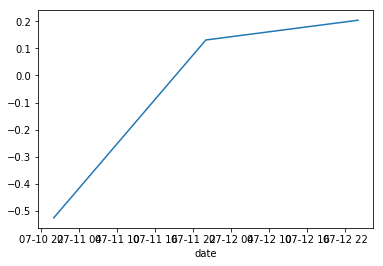

In [244]:
wc_summary.plot()

In [245]:
import textblob

In [246]:
from textblob import TextBlob

In [247]:
wc_df['sentiment2'] = [TextBlob(tweet).sentiment[0] for tweet in wc_df['tweet']]

In [248]:
wc_df.head()

,datetime,tweet,sentiment,date,sentiment2
0,2018-07-11 15:27:00,"b""@Hartwell_co_uk They're goddamn right it is!...",-0.5255,2018-07-11,0.357143
1,2018-07-11 15:27:00,"b""@Hartwell_co_uk They're goddamn right it is!...",-0.5255,2018-07-11,0.357143
2,2018-07-13 15:33:00,b'Here @sandwellroads we\xe2\x80\x99ll be chee...,0.5106,2018-07-13,0.000000
3,2018-07-13 15:33:00,b'RT @CoveBilly: This was the nuts!! \xf0\x9f\...,-0.4374,2018-07-13,0.000000
4,2018-07-13 15:33:00,b'RT @16AirAssltBde: #ItsComingHome \nStill to...,0.0000,2018-07-13,0.000000


In [249]:
wc_summary_tb = wc_df['sentiment2'].groupby(wc_df['date']).mean()

In [250]:
wc_summary_tb

date
2018-07-11    0.357143
2018-07-12    0.143513
2018-07-13    0.196398
Name: sentiment2, dtype: float64

In [251]:
wc_summary_tb2 = wc_df['sentiment2'].groupby(wc_df['date']).median()

In [252]:
wc_summary_tb2

date
2018-07-11    0.357143
2018-07-12    0.000000
2018-07-13    0.000000
Name: sentiment2, dtype: float64